In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,accuracy_score


In [2]:
train=pd.read_csv('train.csv')
train

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [3]:
X=train.drop('quality',axis=1)
y=train['quality']

In [4]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [5]:
dtc=DecisionTreeClassifier(random_state=23)

In [6]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [7]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [8]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [9]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [10]:
gcv.best_score_

-1.0821447133478768

In [11]:
best_model=gcv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, random_state=23)

In [12]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Id,0.000000
1,fixed acidity,0.000000
2,volatile acidity,0.000000
3,citric acid,0.000000
4,residual sugar,0.000000
5,chlorides,0.000000
6,free sulfur dioxide,0.000000
7,total sulfur dioxide,0.000000
8,density,0.000000
9,pH,0.000000


In [13]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
10,sulphates,0.336273
11,alcohol,0.663727


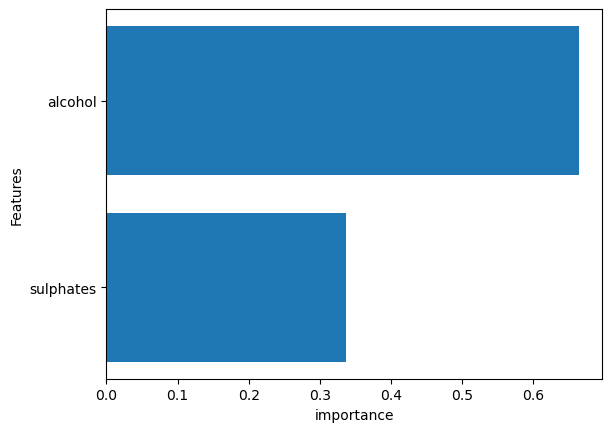

In [14]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()

# Try the best solution

In [15]:
test=pd.read_csv('test.csv')

In [16]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=2,min_samples_leaf=1,min_samples_split=2)
dtc.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=23)

In [17]:
y_pred=dtc.predict(test)
y_pred

array([5, 6, 6, ..., 5, 5, 6])

In [23]:
test_y=pd.DataFrame(y_pred,columns=['quality'])
test_y['Id']=test_y.index
test_y

,quality,Id
0,5,0
1,6,1
2,6,2
3,6,3
4,6,4
...,...,...
1367,6,1367
1368,6,1368
1369,5,1369
1370,5,1370


In [24]:
test_y.to_csv('solution.csv',index=False)

In [ ]:
y_pred_prob=dtc.predict_proba(test)[:,1]
y_pred_prob